In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
integrated = sc.read_h5ad("data/co_integrated_data/cross_species_all_sets.h5ad")

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\anndata\compat\__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
integrated.obs['training_labels'].value_counts() 

training_labels
-1.0    49982
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [4]:
integrated.obs['orig.ident'].value_counts()

orig.ident
KNAF12_Humain-P11_NeuN_180325    8688
GSM7474503                       6784
KNAF14                           6039
KNAF8                            4306
GSE7474501                       4260
ZHANG                            3663
YADAV                            3555
KNAF3                            3265
KNAF11                           2598
KNAF9                            2354
KATHE                            2331
MATSON                           2305
KNAF4                            1820
KNAF10                           1682
BOUV5                            1417
Name: count, dtype: int64

In [5]:
# # Drop BOUV5 
# integrated = integrated[integrated.obs['orig.ident'] != 'BOUV5']

In [34]:
mouse_annotations = sc.read_h5ad("data/annotated_data/mouse_neurons_rpca_xgb.h5ad")

In [35]:
mouse_annotations.obs['orig.ident'].value_counts()

orig.ident
KNAF3     3265
KATHE     2331
MATSON    2305
KNAF4     1820
BOUV5     1417
Name: count, dtype: int64

In [36]:
mouse_annotations

AnnData object with n_obs × n_vars = 11138 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'citeseq', 'annotation', 'labels_xgb', 'labels_svm', 'v1'
    var: 'vf_vst_counts.BOUV5_mean', 'vf_vst_counts.BOUV5_variance', 'vf_vst_counts.BOUV5_variance.expected', 'vf_vst_counts.BOUV5_variance.standardized', 'vf_vst_counts.BOUV5_variable', 'vf_vst_counts.BOUV5_rank', 'vf_vst_counts.KATHE_mean', 'vf_vst_counts.KATHE_variance', 'vf_vst_counts.KATHE_variance.expected', 'vf_vst_counts.KATHE_variance.standardized', 'vf_vst_counts.KATHE_variable', 'vf_vst_counts.KATHE_rank', 'vf_vst_counts.MATSON_mean', 'vf_vst_counts.MATSON_variance', 'vf_vst_counts.MATSON_variance.expected', 'vf_vst_counts.MATSON_variance.standardized', 'vf_vst_counts.MATSON_variable', 'vf_vst_counts.MATSON_rank', 'vf_vst_counts.KNAF3_mean', 'vf_vst_counts.KNAF3_variance', 'vf_vst_counts.KNAF3_variance.expected', 'vf_vst_counts.KNAF3_variance.standardi

In [37]:
mouse_annotations.obs['labels_xgb'].value_counts()

labels_xgb
0    9188
1    1950
Name: count, dtype: int64

In [38]:
mouse_annotations.obs.index = [c[:-2] for c in mouse_annotations.obs.index]

In [5]:
# Add labels_xgb to the integrated dataset
integrated.obs['labels_xgb'] = -1

In [6]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1    55067
Name: count, dtype: int64

In [7]:
# Add labels_xgb to the integrated dataset
integrated.obs['labels_xgb'] = mouse_annotations.obs['labels_xgb']

NameError: name 'mouse_annotations' is not defined

In [6]:
integrated.obs['labels_xgb']

KeyError: 'labels_xgb'

In [ ]:
# replace NaN with -1
# Add -1 category to the dataframe
integrated.obs['labels_xgb'] = integrated.obs['labels_xgb'].astype('float')

integrated.obs['labels_xgb'] = integrated.obs['labels_xgb'].fillna(-1)
integrated.obs['labels_xgb']

BOUV5_M1_SC1_280421_AAACCTGCAGGGTACA-1             -1.0
BOUV5_M1_SC1_280421_AAACCTGGTGAGCGAT-1             -1.0
BOUV5_M1_SC1_280421_AAACCTGGTGTTAAGA-1             -1.0
BOUV5_M1_SC1_280421_AAACGGGCAATAGAGT-1             -1.0
BOUV5_M1_SC1_280421_AAACGGGGTGGTAACG-1             -1.0
                                                   ... 
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCCTCTTG-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTCGACTGC-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCAGTTACGACT-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCAAGCC-1   -1.0
KNAF12_Humain-P11_NeuN_180325_TTTGTCATCGCGGATC-1   -1.0
Name: labels_xgb, Length: 55067, dtype: float64

In [ ]:
integrated.obs['training_labels'].value_counts()

training_labels
-1.0    49982
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [ ]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1.0    55067
Name: count, dtype: int64

In [ ]:
integrated.obs['labels_xgb'].value_counts()

labels_xgb
-1.0    55067
Name: count, dtype: int64

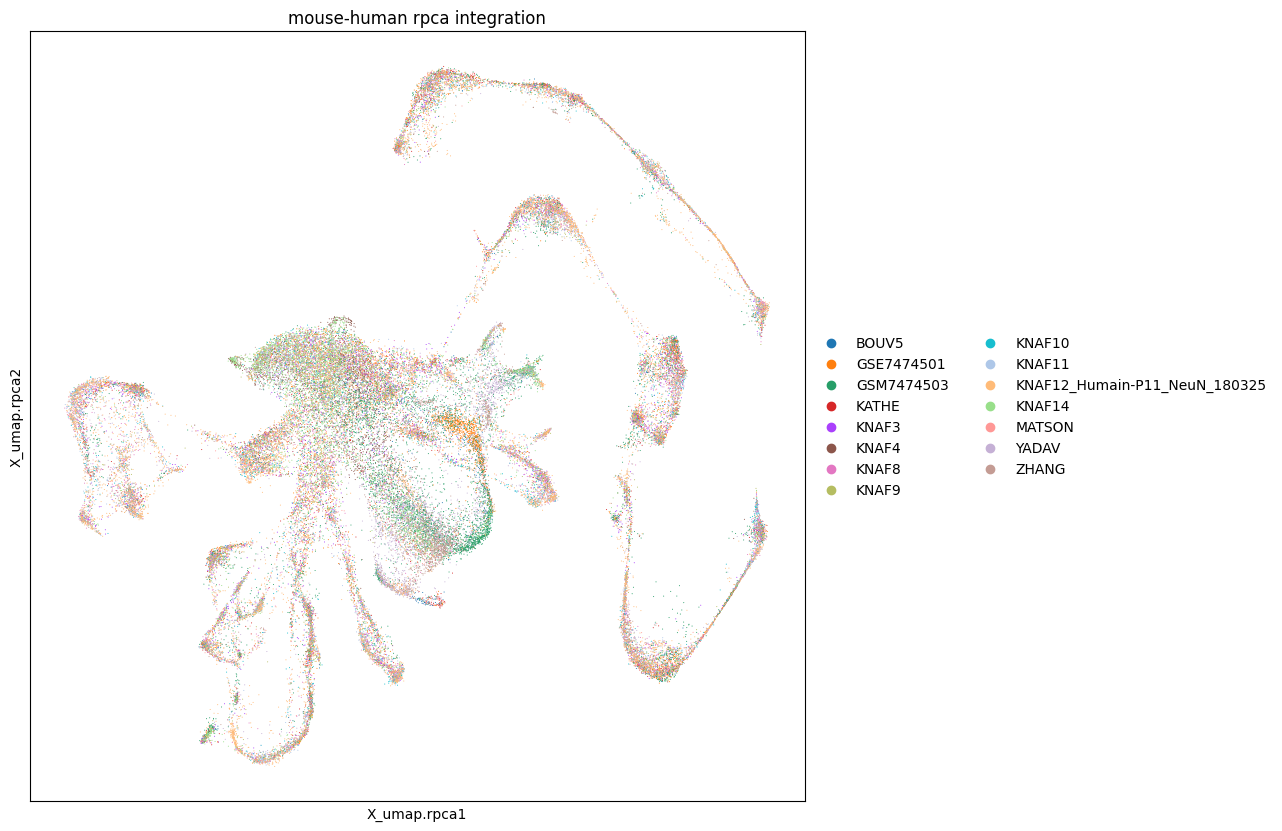

In [ ]:
# Plot the UMAP of the integrated dataset
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis='X_umap.rpca', color='orig.ident', title='mouse-human rpca integration', ax =ax)

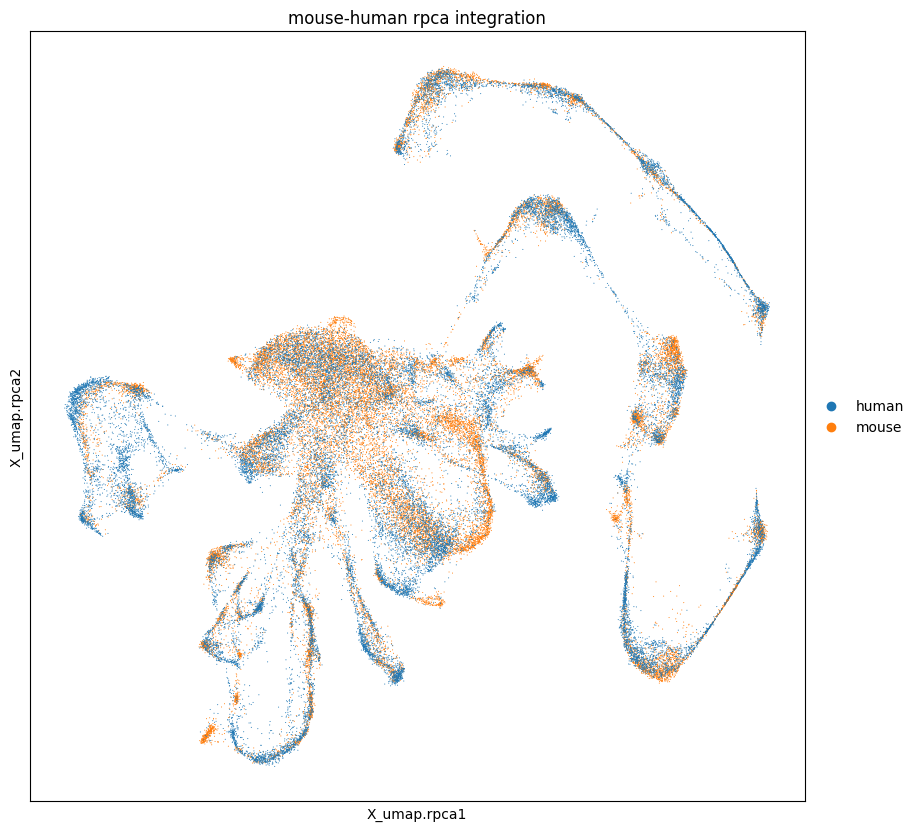

In [ ]:
# Plot the UMAP of the integrated dataset
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis='X_umap.rpca', color='species', title='mouse-human rpca integration', ax =ax)

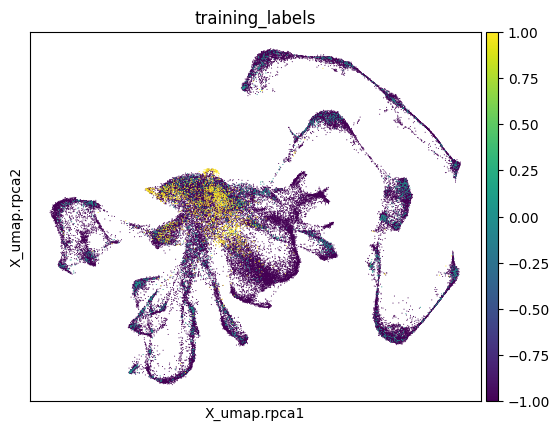

In [ ]:
# Plot the UMAP of the integrated dataset
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='training_labels')

In [7]:
integrated.obs['training_labels'].groupby(integrated.obs['orig.ident']).value_counts()

orig.ident                     training_labels
BOUV5                          -1.0               1417
GSE7474501                     -1.0               4260
GSM7474503                     -1.0               6784
KATHE                          -1.0               2331
KNAF10                         -1.0               1682
KNAF11                         -1.0               2598
KNAF12_Humain-P11_NeuN_180325  -1.0               8688
KNAF14                         -1.0               6039
KNAF3                           0.0               3265
KNAF4                           1.0               1820
KNAF8                          -1.0               4306
KNAF9                          -1.0               2354
MATSON                         -1.0               2305
YADAV                          -1.0               3555
ZHANG                          -1.0               3663
Name: count, dtype: int64

In [8]:
integrated.obs['annotation'] = integrated.obs['training_labels'].apply(lambda x: 'V1_CITEseq+' if x == 1 else 'CITEseq-' if x == 0 else 'Unnassigned')

In [9]:
integrated.obs['annotation'] = integrated.obs['annotation'].astype('category')

In [10]:
integrated.obs['training_labels'].value_counts()

training_labels
-1.0    49982
 0.0     3265
 1.0     1820
Name: count, dtype: int64

In [11]:
integrated.uns['annotation_colors'] = ['yellow', 'blue', 'green']

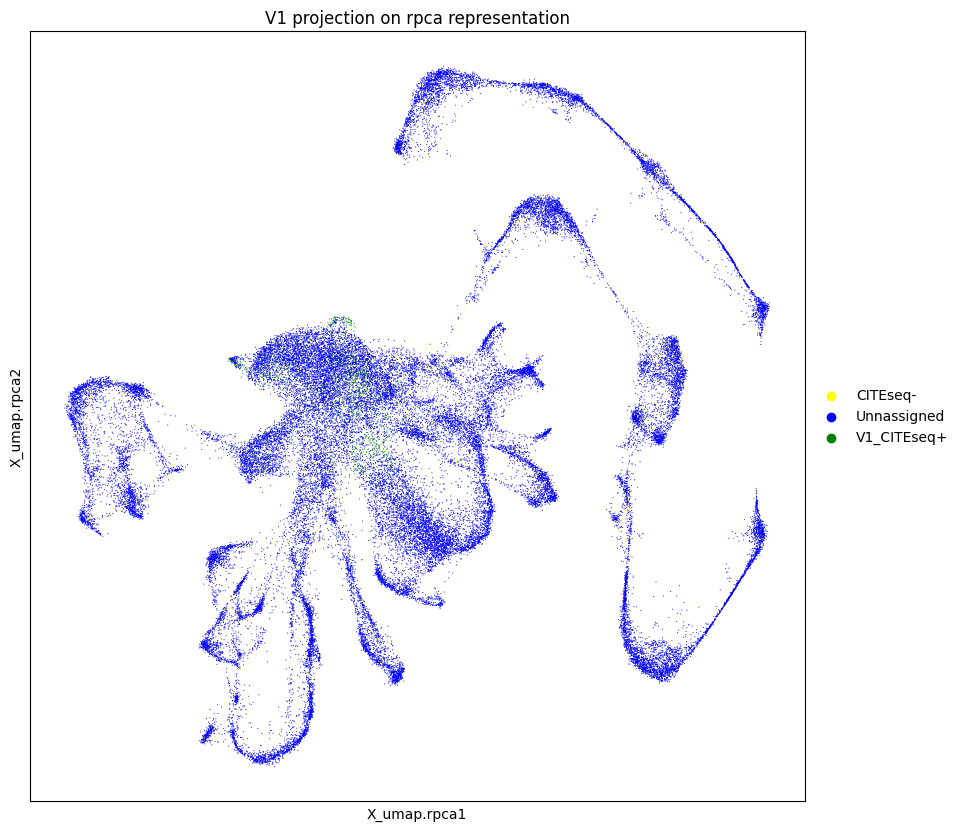

In [12]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='annotation', title = 'V1 projection on rpca representation', ax = ax)

In [22]:
# # try changing the data distribution to be more balanced
# # 1. downsample the majority class
# # 2. upsample the minority class

# # downsample the majority class
# from sklearn.utils import resample

# # Separate majority and minority classes
# integrated_majority = integrated[integrated.obs['training_labels'] == 0]
# integrated_minority = integrated[integrated.obs['training_labels'] == 1]

# # Downsample majority class
# integrated_majority_downsampled = resample(integrated_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=integrated_minority.shape[0],     # to match minority class
#                                  random_state=123) # reproducible results

# # Combine minority class with downsampled majority class
# integrated_downsampled = sc.concat([integrated_majority_downsampled, integrated_minority])

# integrated_downsampled.obs['training_labels'].value_counts()

## Ajustments

In [29]:
# Plot umap to show species
sc.pl.umap(integrated, color='species', title='Species')

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [ ]:
# Check the distance between species
sc.pp.neighbors(integrated)
sc.tl.umap(integrated)
sc.pl.umap(integrated, color='species', title='Species')

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x00000195ACB3C540>
Traceback (most recent call last):
  File "C:\Users\Emile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


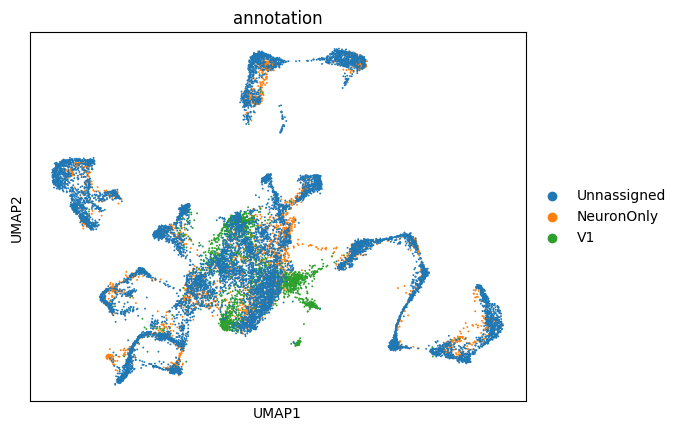

In [ ]:
# Plot umap with training labels
sc.pl.umap(integrated, color='annotation', save='integrated_umap_annotation.png')

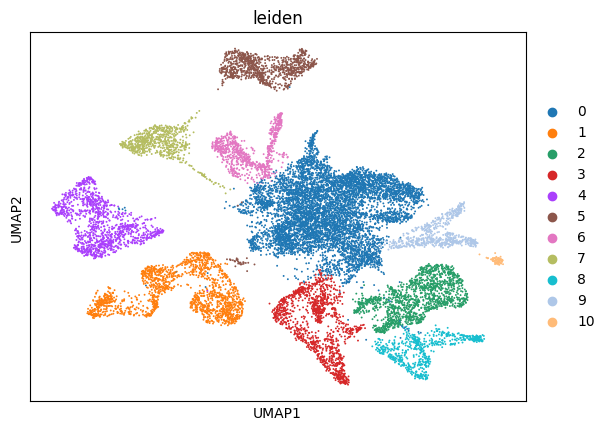

In [ ]:
# Compute clusters
sc.tl.leiden(integrated, resolution=0.1)

# Plot umap with clusters
sc.pl.umap(integrated, color='leiden')

In [ ]:
integrated.obs['leiden']

KNAF3_En1Sun1NeuN_AAACCTGAGATGCGAC-1                0
KNAF3_En1Sun1NeuN_AAACCTGCAAACGCGA-1                0
KNAF3_En1Sun1NeuN_AAACCTGCACTTGGAT-1                9
KNAF3_En1Sun1NeuN_AAACCTGCATAGACTC-1                0
KNAF3_En1Sun1NeuN_AAACCTGCATATGAGA-1                0
                                                   ..
KNAF11_Humain-P13_NeuN_221124_TTTGTCAAGCTACCTA-1    7
KNAF11_Humain-P13_NeuN_221124_TTTGTCAGTAGCCTCG-1    1
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCCTGTACC-1    0
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCGGGAGTA-1    5
KNAF11_Humain-P13_NeuN_221124_TTTGTCATCTTGTCAT-1    0
Name: leiden, Length: 16025, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [ ]:
# Consider only clusters with V1 mouse cells in them

# Get the cluster with V1 mouse cells
nb_V1_in_cluster = integrated.obs[integrated.obs['training_labels'] != -1].groupby('leiden').size()

C:\Users\Emile\AppData\Local\Temp\ipykernel_6248\3754515066.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nb_V1_in_cluster = integrated.obs[integrated.obs['training_labels'] != -1].groupby('leiden').size()


In [ ]:
nb_V1_in_cluster

leiden
0     3205
1      309
2      192
3      294
4      255
5      269
6      118
7      149
8      150
9       76
10      68
dtype: int64

In [ ]:
integrated_zoom = integrated[integrated.obs['leiden'].isin(nb_V1_in_cluster[nb_V1_in_cluster > 200].index)]

In [ ]:
integrated_zoom

View of AnnData object with n_obs × n_vars = 11771 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'integrated_snn_res.0.5', 'seurat_clusters', 'training_labels', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'leiden'
    var: 'features'
    uns: 'neighbors', 'species_colors', 'umap', 'training_labels_colors', 'predicted_labels_xgb_colors', 'predicted_labels_svm_colors', 'predicted_labels_knn_colors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Training using predicted mouse annotation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [31]:
integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_16428\2359467213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()


species  orig.ident
human    KNAF8         4306
         ZHANG         3663
         YADAV         3555
         KNAF11        2598
         KNAF9         2354
         KNAF10        1682
         BOUV5            0
         KATHE            0
         KNAF3            0
         KNAF4            0
         MATSON           0
         TREVISAN         0
mouse    TREVISAN      6964
         KNAF3         3265
         KATHE         2331
         MATSON        2305
         KNAF4         1820
         BOUV5         1417
         KNAF8            0
         KNAF9            0
         KNAF10           0
         KNAF11           0
         YADAV            0
         ZHANG            0
Name: count, dtype: int64

In [32]:
# Split data

train_data = integrated[integrated.obs['training_labels'] != -1]

X = train_data.obsm['X_rpca']
y = train_data.obs['training_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [33]:
# Plot sizes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7776, 50)
(1945, 50)
(7776,)
(1945,)


In [34]:
# Look at the distribution of the training labels
y_train.value_counts()

training_labels
0.0    6069
1.0    1707
Name: count, dtype: int64

In [35]:
# Train an xgb classifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 94.34%
F1: 86.49%


In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Emile\AppData\Local\Programs\Python\P

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [36]:
xgb = grid_search.best_estimator_

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

NameError: name 'grid_search' is not defined

In [37]:
# Train an svm 

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 94.45%
F1: 86.73%


In [38]:
# Train a knn classifier on PCA data

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 90.44%
F1: 80.30%


In [39]:
# Look number of predicted labels
print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred_svm).value_counts())
print(pd.Series(y_pred_knn).value_counts())


0    1559
1     386
Name: count, dtype: int64
0.0    1559
1.0     386
Name: count, dtype: int64
0.0    1429
1.0     516
Name: count, dtype: int64


In [40]:
# Predict on all data
X_all = integrated.obsm['X_rpca']

y_pred_all_xgb = xgb.predict(X_all)
y_pred_all_svm = svm.predict(X_all)
y_pred_all_knn = knn.predict(X_all)


# Add predictions to the integrated object
integrated.obs['predicted_labels_xgb'] = y_pred_all_xgb
integrated.obs['predicted_labels_svm'] = y_pred_all_svm
integrated.obs['predicted_labels_knn'] = y_pred_all_knn


In [41]:
# Look at the distribution of the predicted labels
print(pd.Series(y_pred_all_xgb).value_counts())
print(pd.Series(y_pred_all_svm).value_counts())
print(pd.Series(y_pred_all_knn).value_counts())

0    27447
1     8813
Name: count, dtype: int64
0.0    27186
1.0     9074
Name: count, dtype: int64
0.0    23051
1.0    13209
Name: count, dtype: int64


In [42]:
# Labels as categories
integrated.obs['predicted_labels_xgb'] = integrated.obs['predicted_labels_xgb'].astype('category')
integrated.obs['predicted_labels_svm'] = integrated.obs['predicted_labels_svm'].astype('category')
integrated.obs['predicted_labels_knn'] = integrated.obs['predicted_labels_knn'].astype('category')


In [63]:
integrated.obs['predicted_annotation'] = integrated.obs['predicted_labels_xgb'].apply(lambda x: 'V1' if x == 1 else 'NeuronOnly' if x == 0 else 'Unnassigned')

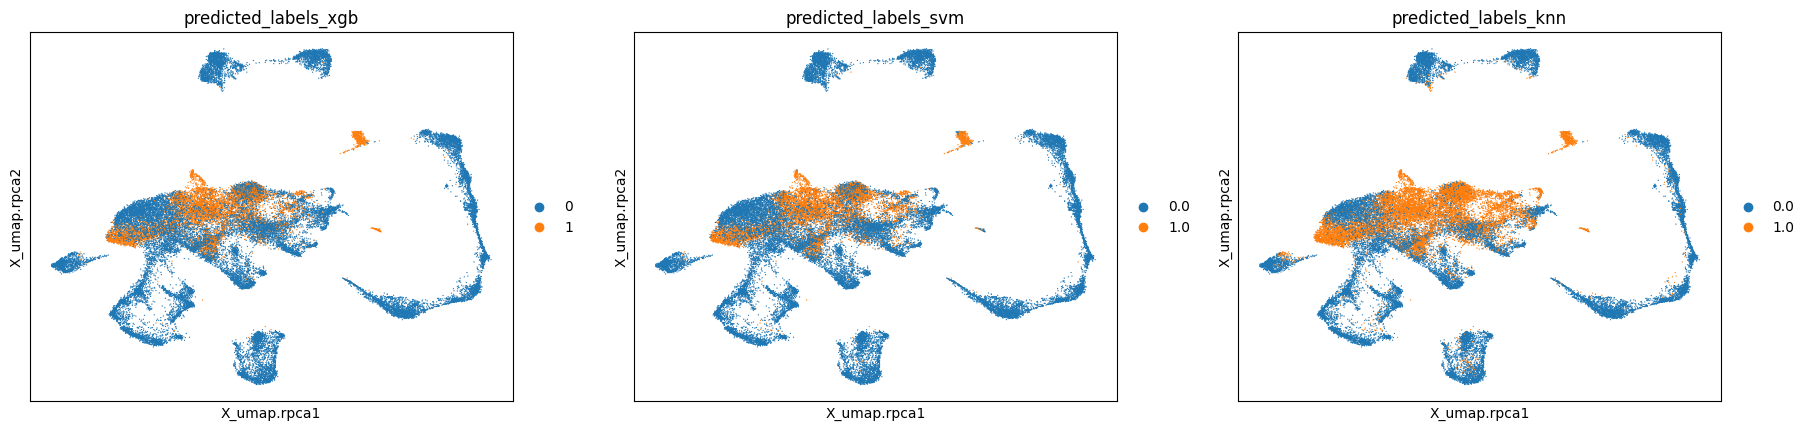

In [64]:
## Plotting

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color=['predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn'])

In [110]:
integrated.uns['predicted_annotation_colors'] = ['yellow', 'green']

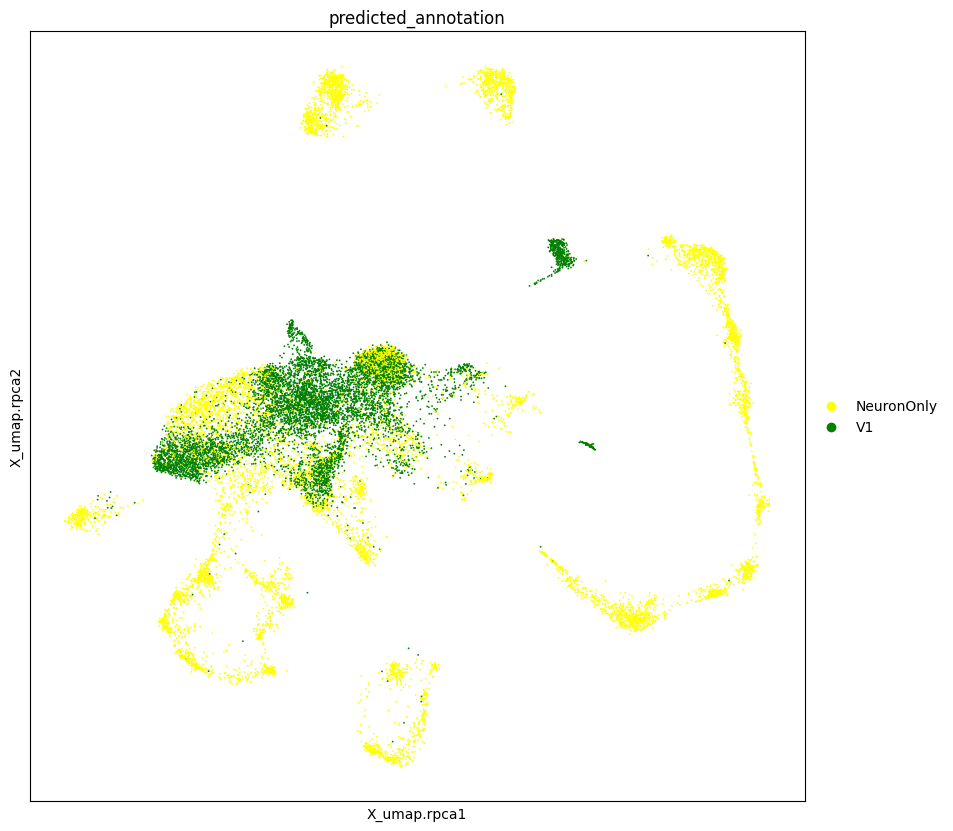

In [119]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'mouse'], basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)

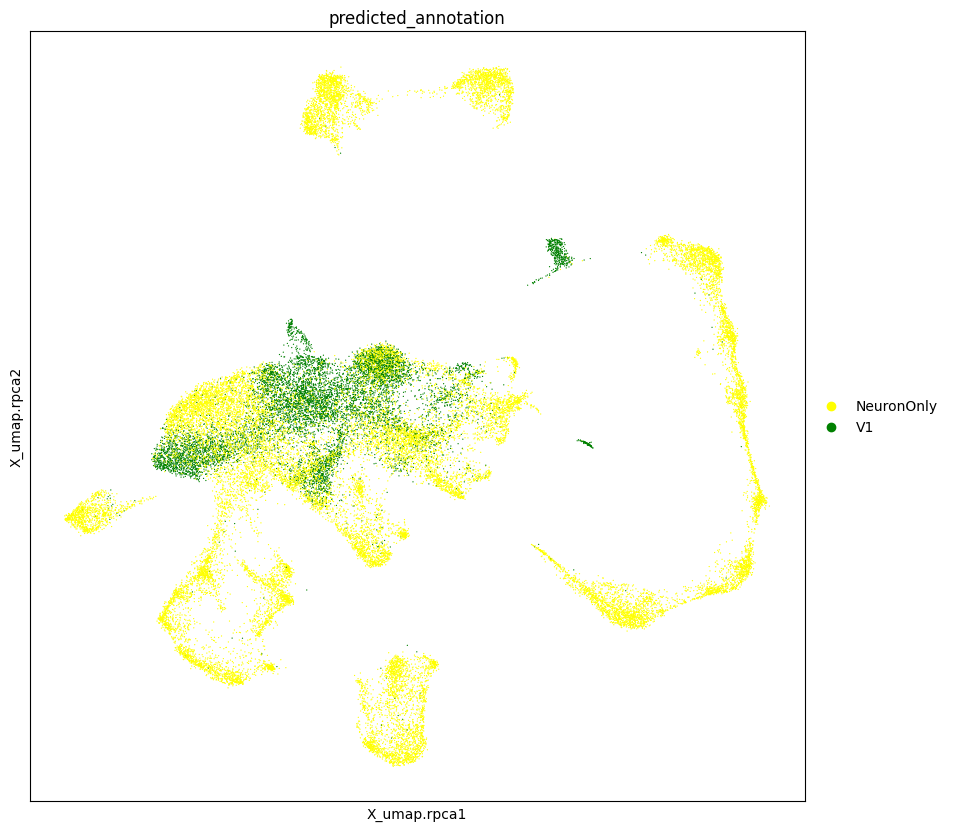

In [111]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)


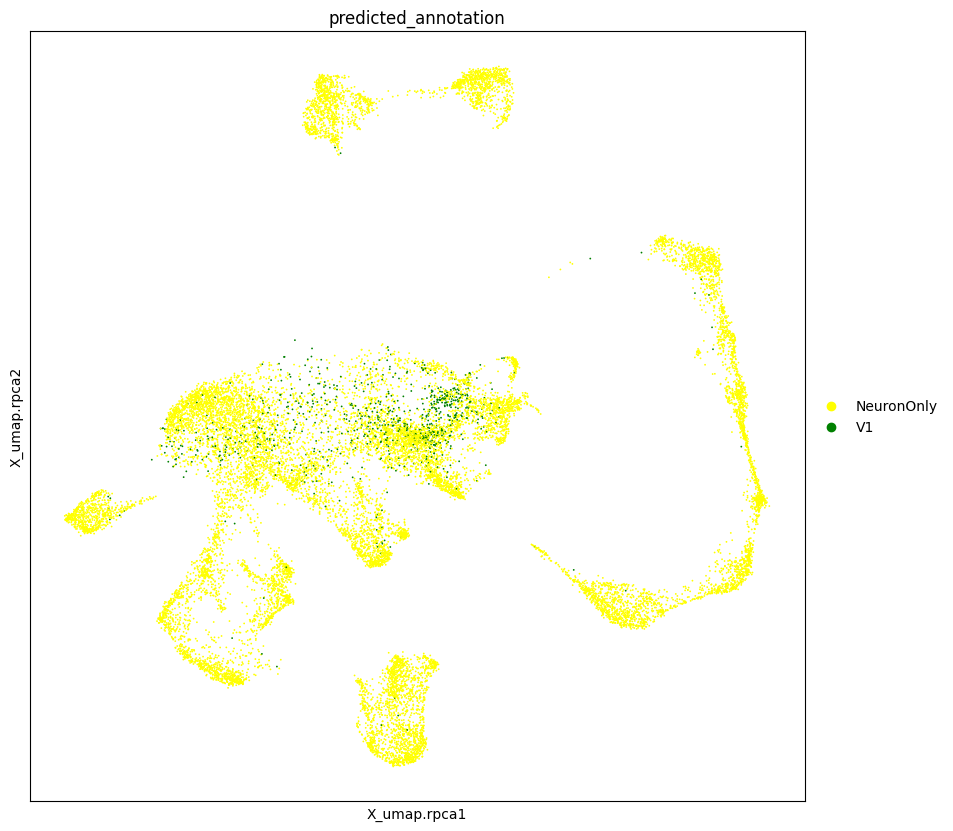

In [112]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='predicted_annotation', ax = ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='orig.ident', ax = ax)

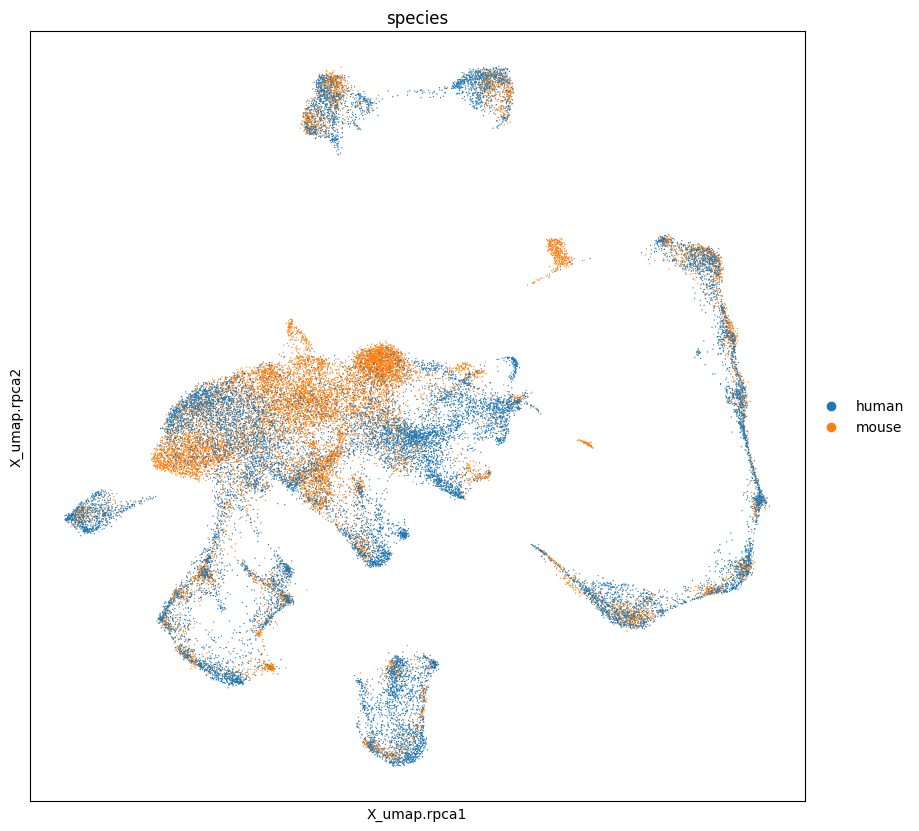

In [116]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='species', ax = ax)

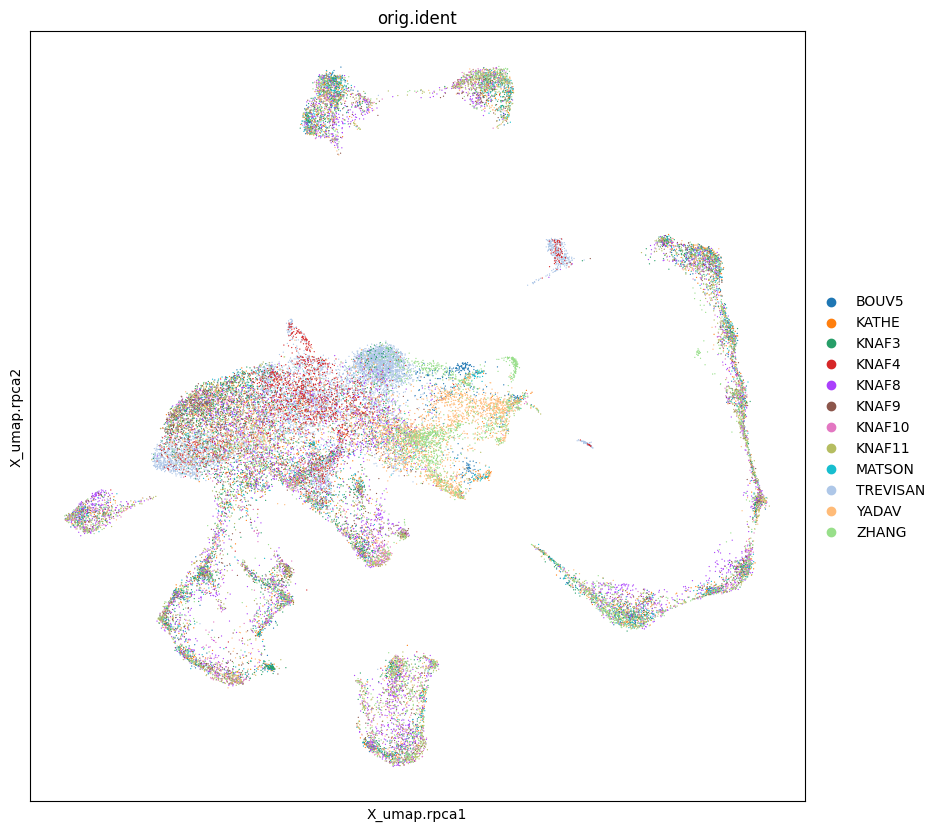

In [115]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='orig.ident', ax = ax)

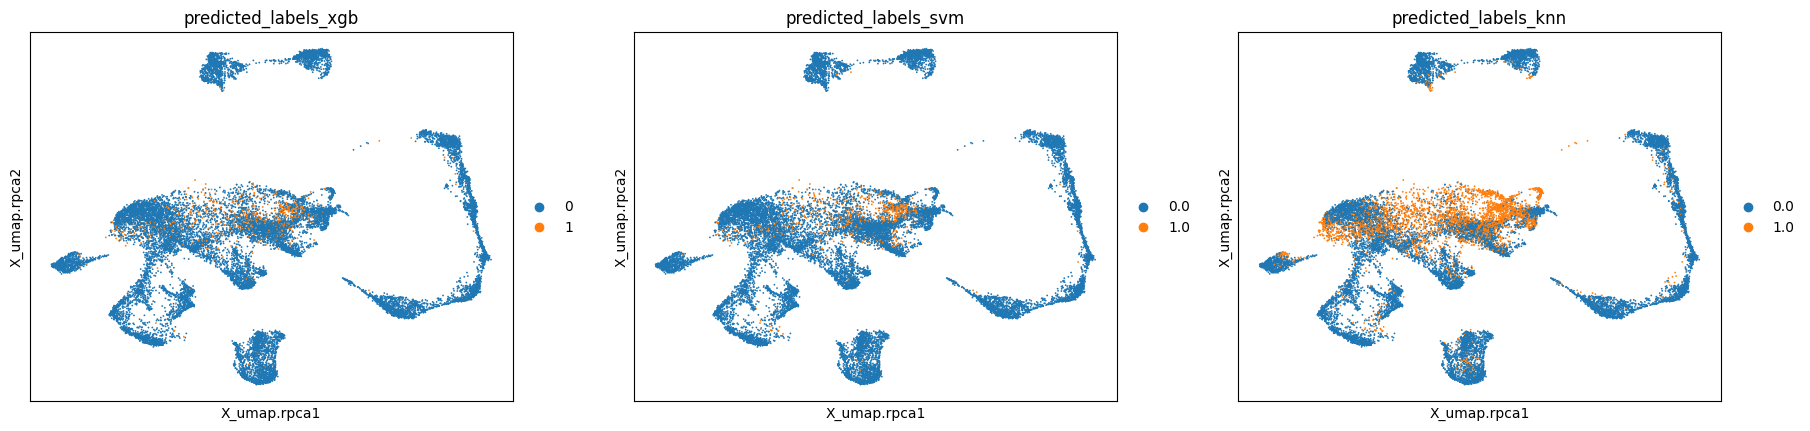

In [44]:
# Plot only human neurons
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn'])

In [124]:
sc.pp.neighbors(integrated, use_rep='X_rpca')


In [125]:
sc.tl.leiden(integrated)

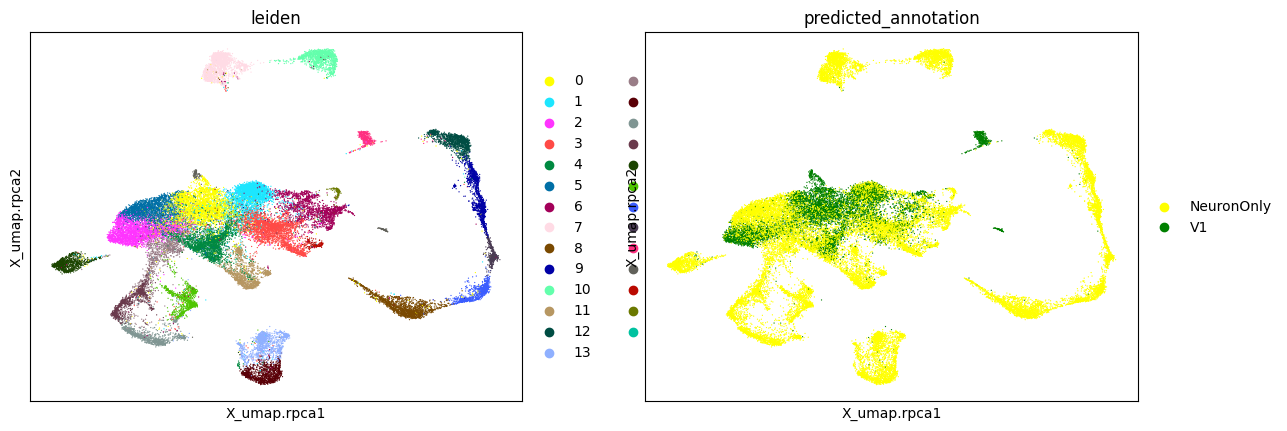

In [129]:
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color=['leiden', 'predicted_annotation'])

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\plotting\_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


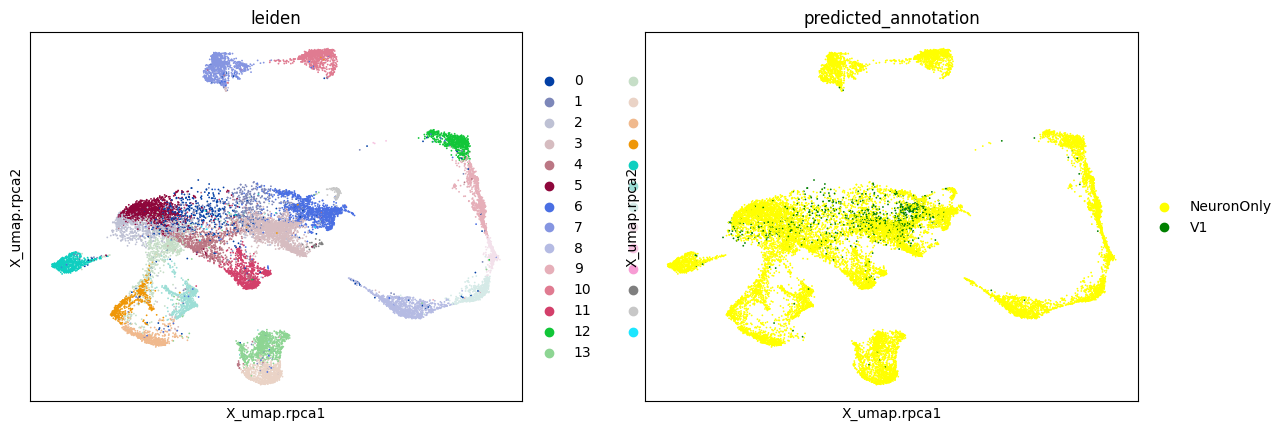

In [130]:
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['leiden', 'predicted_annotation'])

## Training using only knaf3-4 for ref

In [13]:
integrated.obs['training_labels'] = integrated.obs['orig.ident'].apply(lambda x: 1 if x == 'KNAF4' else 0 if x == 'KNAF3' else -1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

In [15]:
integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()

C:\Users\Emile\AppData\Local\Temp\ipykernel_21480\2359467213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  integrated.obs['orig.ident'].groupby(integrated.obs['species']).value_counts()


species  orig.ident                   
human    KNAF12_Humain-P11_NeuN_180325    8688
         KNAF8                            4306
         ZHANG                            3663
         YADAV                            3555
         KNAF11                           2598
         KNAF9                            2354
         KNAF10                           1682
         BOUV5                               0
         GSE7474501                          0
         GSM7474503                          0
         KATHE                               0
         KNAF3                               0
         KNAF4                               0
         KNAF14                              0
         MATSON                              0
mouse    GSM7474503                       6784
         KNAF14                           6039
         GSE7474501                       4260
         KNAF3                            3265
         KATHE                            2331
         MATSON      

## Training

In [17]:
# Split data

train_data = integrated[integrated.obs['training_labels'] != -1]

X = train_data.X
y = train_data.obs['training_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [18]:
# Plot sizes 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4068, 2000)
(1017, 2000)
(4068,)
(1017,)


In [19]:
# Look at the distribution of the training labels
y_train.value_counts()

training_labels
0    2597
1    1471
Name: count, dtype: int64

In [20]:
# Train an xgb classifier
xgb = XGBClassifier()

In [21]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\Emile\AppData\Local\Programs\Python\Py

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [23]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
xgb_best = XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 200)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
scores = cross_val_score(xgb_best, X, y, cv=5)
scores

array([0.93608653, 0.94001967, 0.93608653, 0.94690265, 0.94001967])

In [74]:
y_pred_xgb = xgb_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 94.30%
F1: 91.92%


In [33]:
def plot_best_features(model, train_data, n = 20):
    """Plots the most important features for classification"""
    best_features_indexes = np.argsort(model.feature_importances_)[-n:]
    best_features = train_data.var_names[best_features_indexes]
    fig, ax = plt.subplots(1,1, figsize = (20,9))
    plt.bar(best_features,model.feature_importances_[best_features_indexes])
    plt.show()

Fold 0:
  Train: index=[   1    2    3 ... 5082 5083 5084]
  Test:  index=[   0    4    6 ... 5065 5066 5077]
####### Training finished #######
True Negative:  628
False Positive:  26
False Negative:  15
True Positive:  348
Accuracy:  0.95968534906588
F1_score:  0.9443690637720489
Looking at best features.......


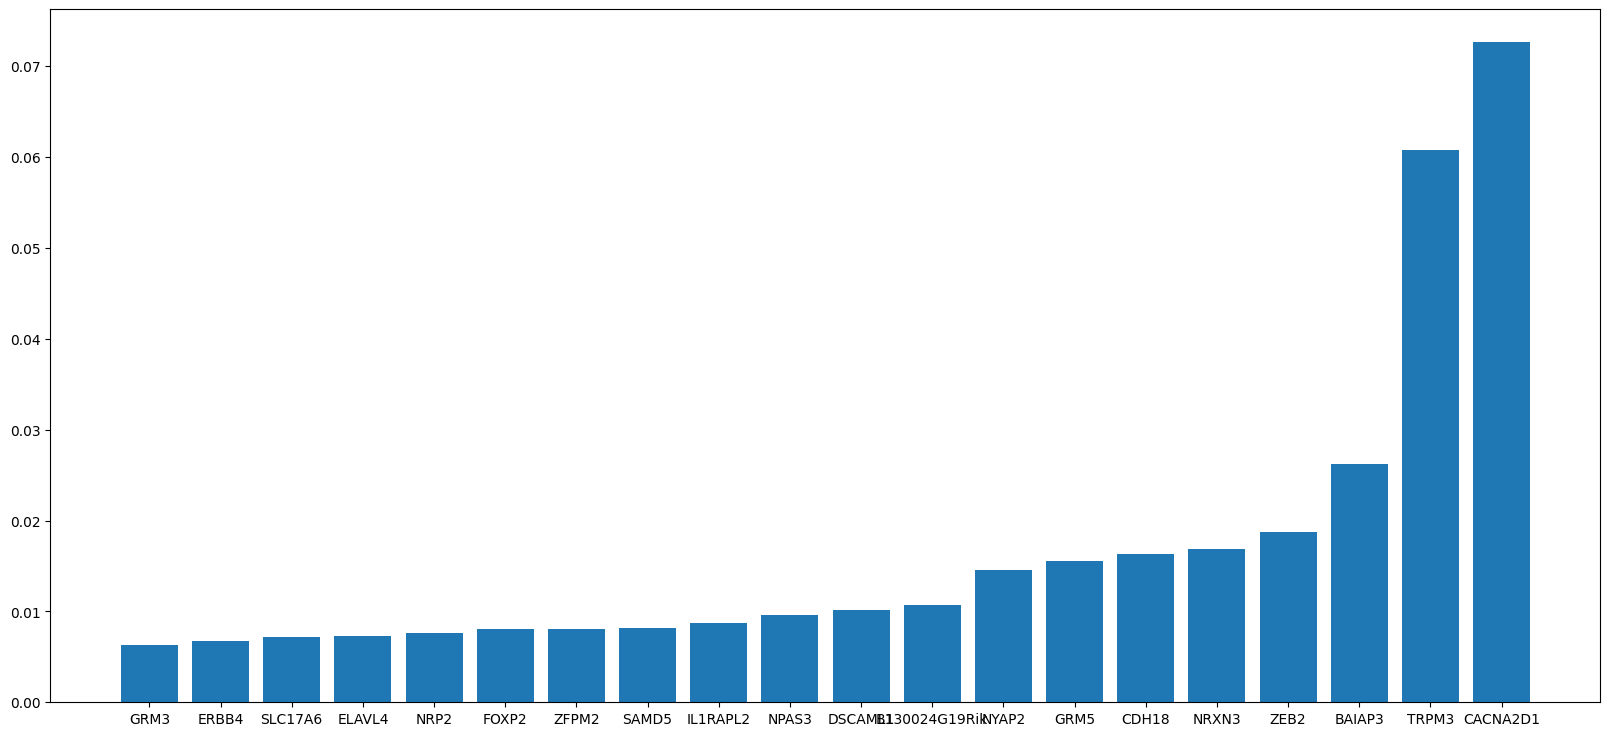

Fold 1:
  Train: index=[   0    2    4 ... 5080 5081 5083]
  Test:  index=[   1    3   10 ... 5076 5082 5084]
####### Training finished #######
True Negative:  640
False Positive:  21
False Negative:  5
True Positive:  351
Accuracy:  0.9744346116027532
F1_score:  0.9642857142857143
Looking at best features.......


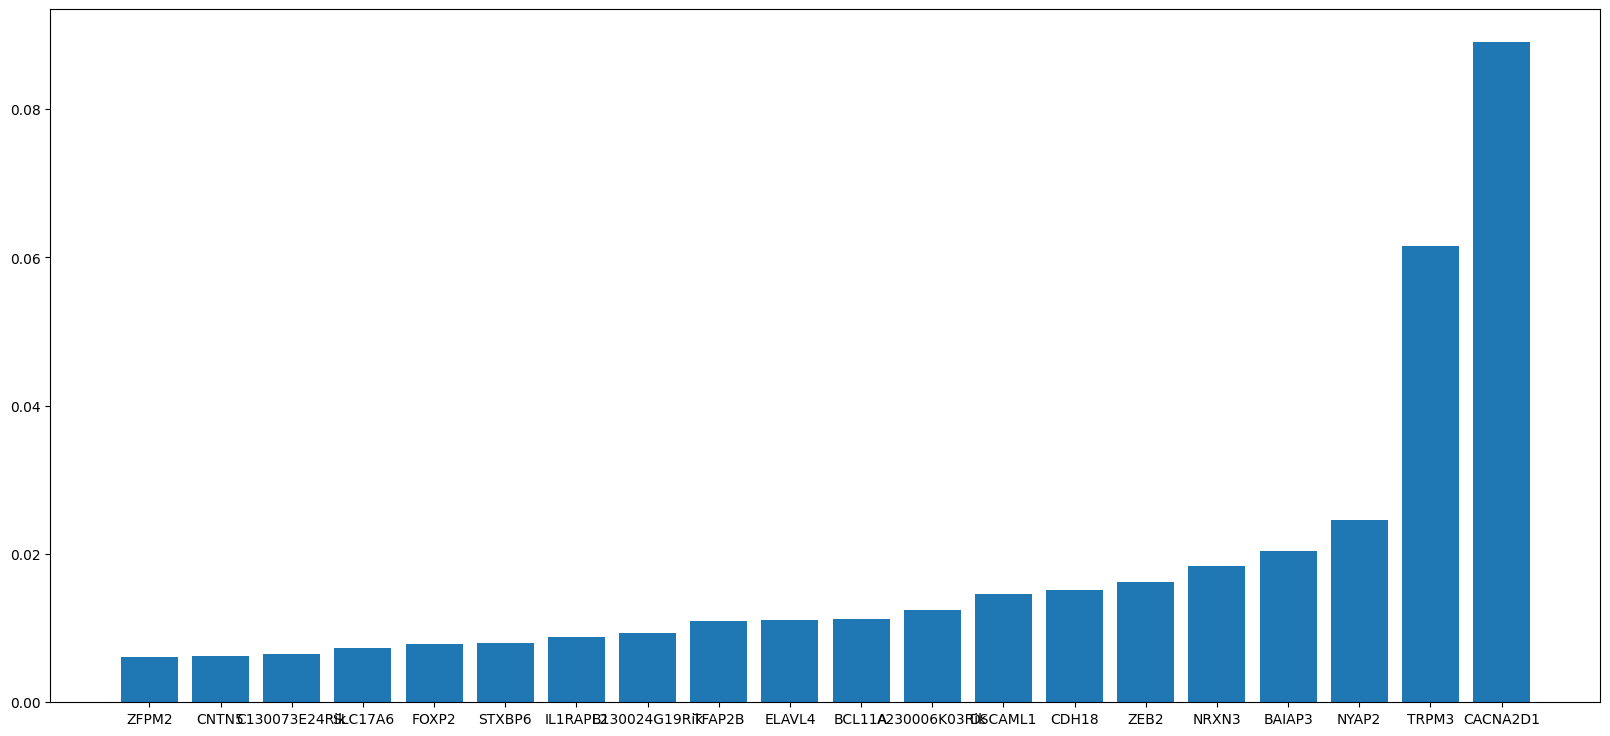

Fold 2:
  Train: index=[   0    1    3 ... 5081 5082 5084]
  Test:  index=[   2   11   17 ... 5073 5074 5083]
####### Training finished #######
True Negative:  624
False Positive:  26
False Negative:  7
True Positive:  360
Accuracy:  0.967551622418879
F1_score:  0.9561752988047809
Looking at best features.......


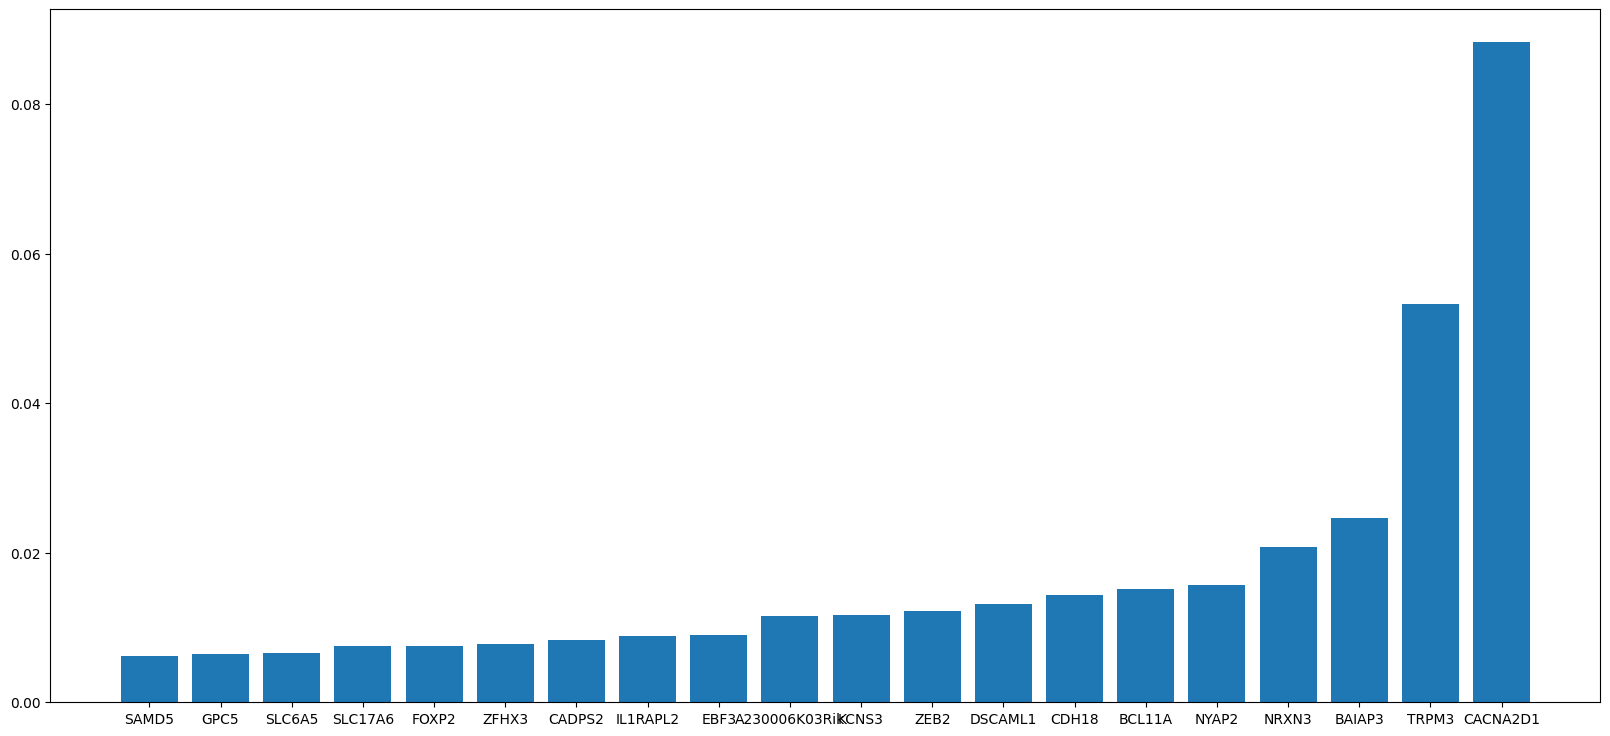

Fold 3:
  Train: index=[   0    1    2 ... 5082 5083 5084]
  Test:  index=[   5   14   31 ... 5075 5079 5080]
####### Training finished #######
True Negative:  624
False Positive:  21
False Negative:  9
True Positive:  363
Accuracy:  0.9705014749262537
F1_score:  0.9603174603174603
Looking at best features.......


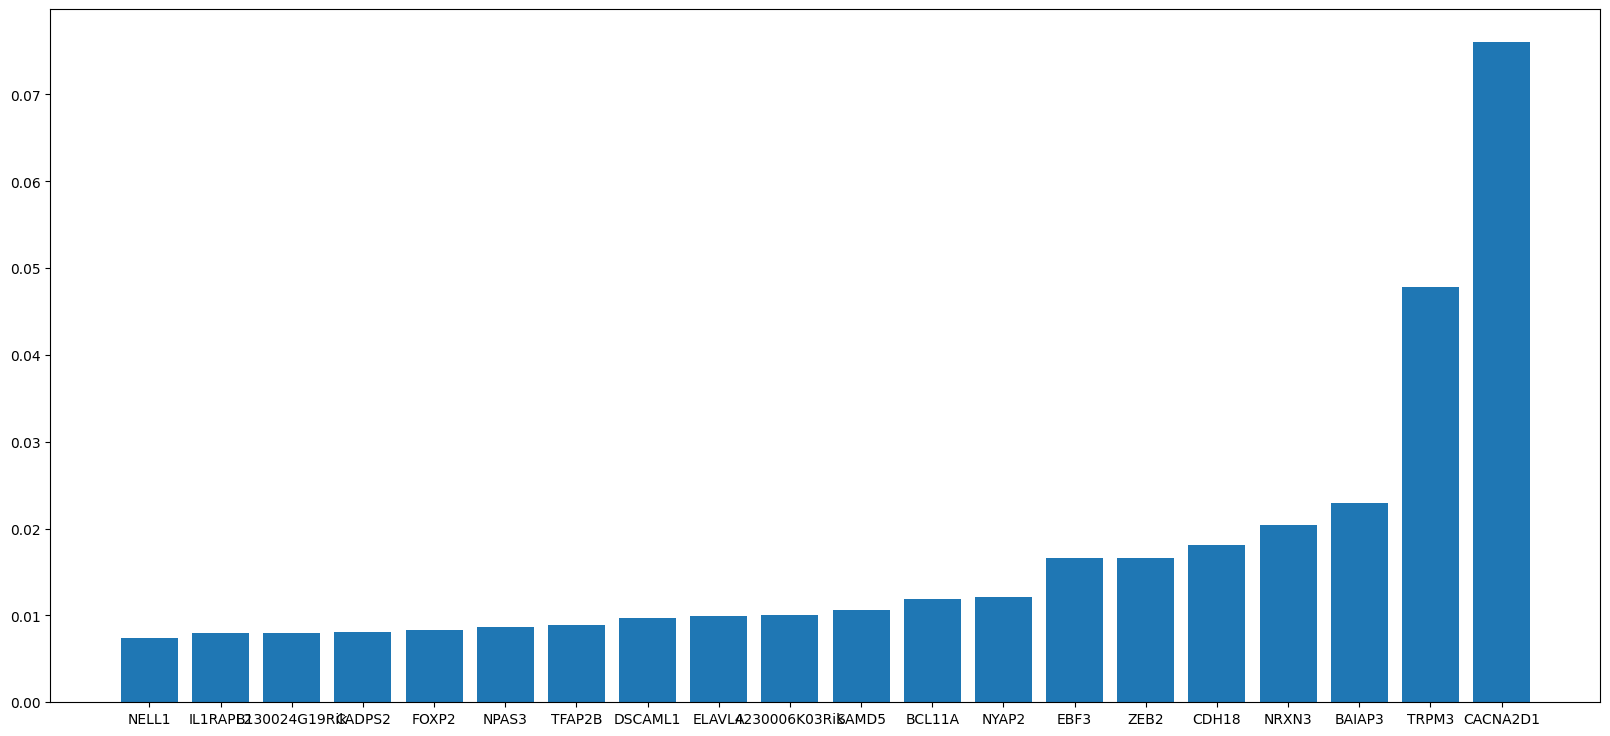

Fold 4:
  Train: index=[   0    1    2 ... 5082 5083 5084]
  Test:  index=[   8   12   13 ... 5072 5078 5081]
####### Training finished #######
True Negative:  637
False Positive:  18
False Negative:  11
True Positive:  351
Accuracy:  0.9714847590953786
F1_score:  0.960328317373461
Looking at best features.......


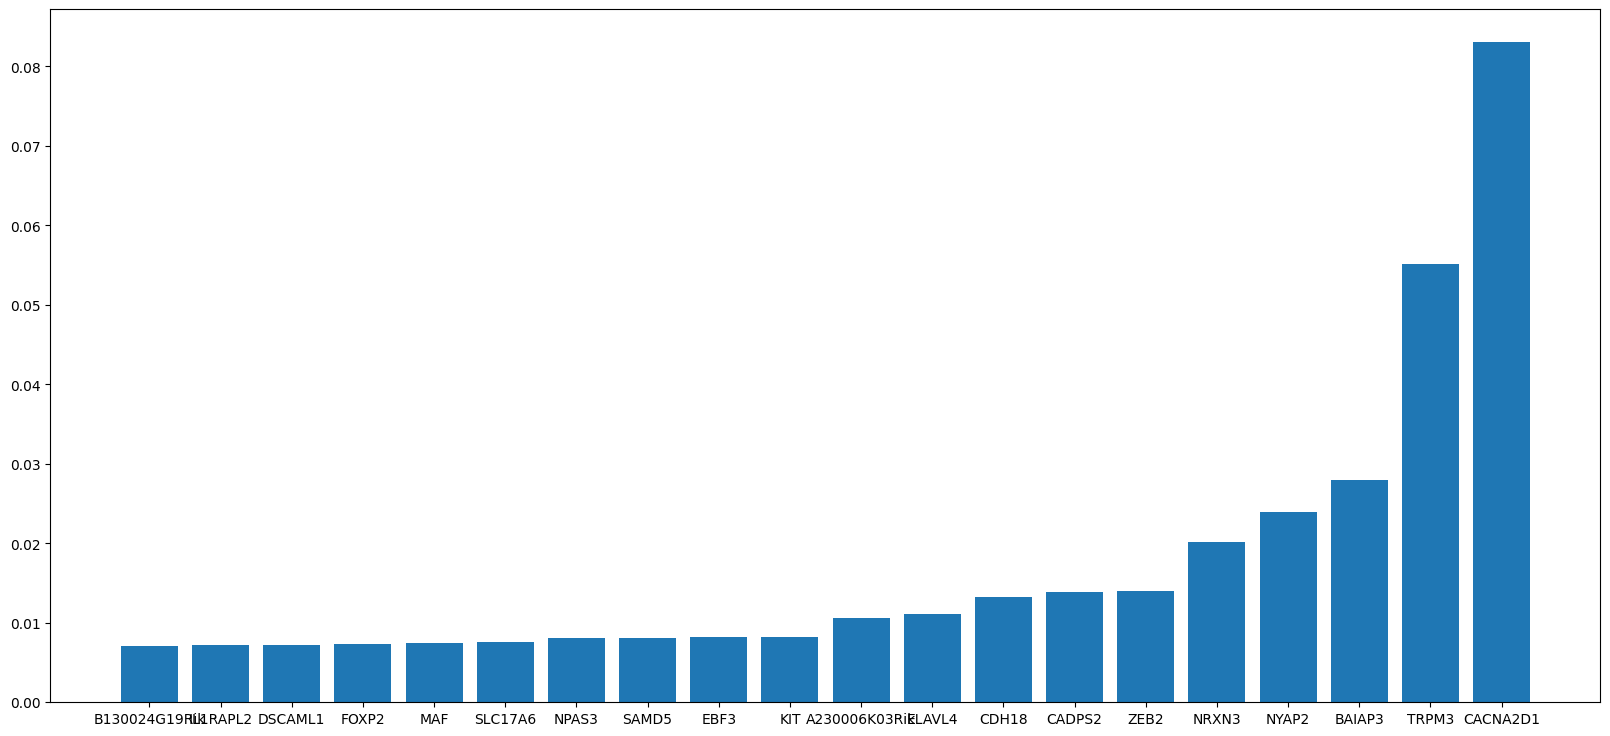

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

kf = KFold(shuffle = True)
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    xgb = XGBClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 200, random_state = 1)
    xgb.fit(X[train_index], y.iloc[train_index])
    print("####### Training finished #######")
    y_pred_test = xgb.predict(X[test_index])
    tn, fp, fn, tp = confusion_matrix(y.iloc[test_index], y_pred_test).ravel()
    print('True Negative: ', tn)
    print('False Positive: ', fp)
    print('False Negative: ', fn)
    print('True Positive: ', tp)
    print('Accuracy: ', accuracy_score(y.iloc[test_index], y_pred_test))
    print('F1_score: ', f1_score(y.iloc[test_index], y_pred_test))
    print("Looking at best features.......")
    plot_best_features(xgb, train_data)

In [36]:
# Train an svm 

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 96.46%
F1: 95.08%


In [37]:
scores = cross_val_score(svm, X, y, cv=5)
scores

array([0.97640118, 0.96165192, 0.96853491, 0.96558505, 0.98328417])

In [38]:
# Train a knn classifier on PCA data

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 84.68%
F1: 77.97%


In [59]:
# Look number of predicted labels
print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred_svm).value_counts())
print(pd.Series(y_pred_knn).value_counts())


0    333
1    176
Name: count, dtype: int64
0    319
1    190
Name: count, dtype: int64
0    331
1    178
Name: count, dtype: int64


In [28]:
xgb_best.save_model("models/xgb_cross_species_annotation.json")

## Prediction

In [75]:
# Predict on all data
X_all = integrated.X

y_pred_all_xgb = xgb_best.predict(X_all)
# y_pred_all_svm = svm.predict(X_all)
# y_pred_all_knn = knn.predict(X_all)


# Add predictions to the integrated object
integrated.obs['predicted_labels_xgb'] = y_pred_all_xgb
# integrated.obs['predicted_labels_svm'] = y_pred_all_svm
# integrated.obs['predicted_labels_knn'] = y_pred_all_knn


In [76]:
# Look at the distribution of the predicted labels
print(pd.Series(y_pred_all_xgb).value_counts())
# print(pd.Series(y_pred_all_svm).value_counts())
# print(pd.Series(y_pred_all_knn).value_counts())

0    49563
1     5504
Name: count, dtype: int64


In [77]:
# Labels as categories
integrated.obs['predicted_labels_xgb'] = integrated.obs['predicted_labels_xgb'].astype('category')
# integrated.obs['predicted_labels_svm'] = integrated.obs['predicted_labels_svm'].astype('category')
# integrated.obs['predicted_labels_knn'] = integrated.obs['predicted_labels_knn'].astype('category')


c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\plotting\_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


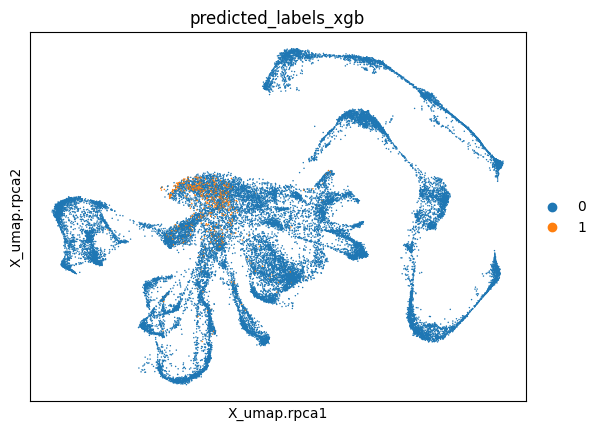

In [78]:
# Plot only human neurons
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color=['predicted_labels_xgb'])

In [79]:
integrated.obs['predicted_annotation'] = integrated.obs['predicted_labels_xgb'].apply(lambda x: 'V1_predicted' if x == 1 else 'Not_V1_predicted')

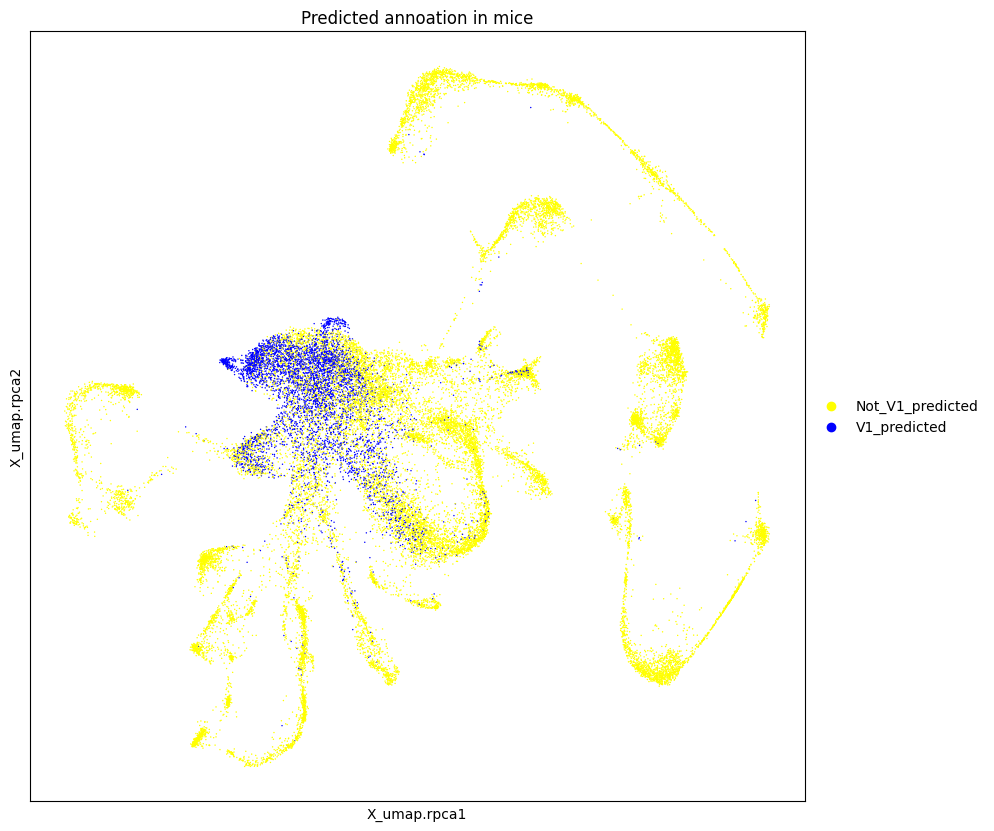

In [80]:
## Plotting
fig, ax = plt.subplots(1,1, figsize = (10,10))

sc.pl.embedding(integrated[integrated.obs['species'] == 'mouse'], basis = 'X_umap.rpca', color='predicted_annotation', title = 'Predicted annoation in mice', ax = ax)

In [81]:
integrated.uns['predicted_annotation_colors'] = ['yellow', 'blue']

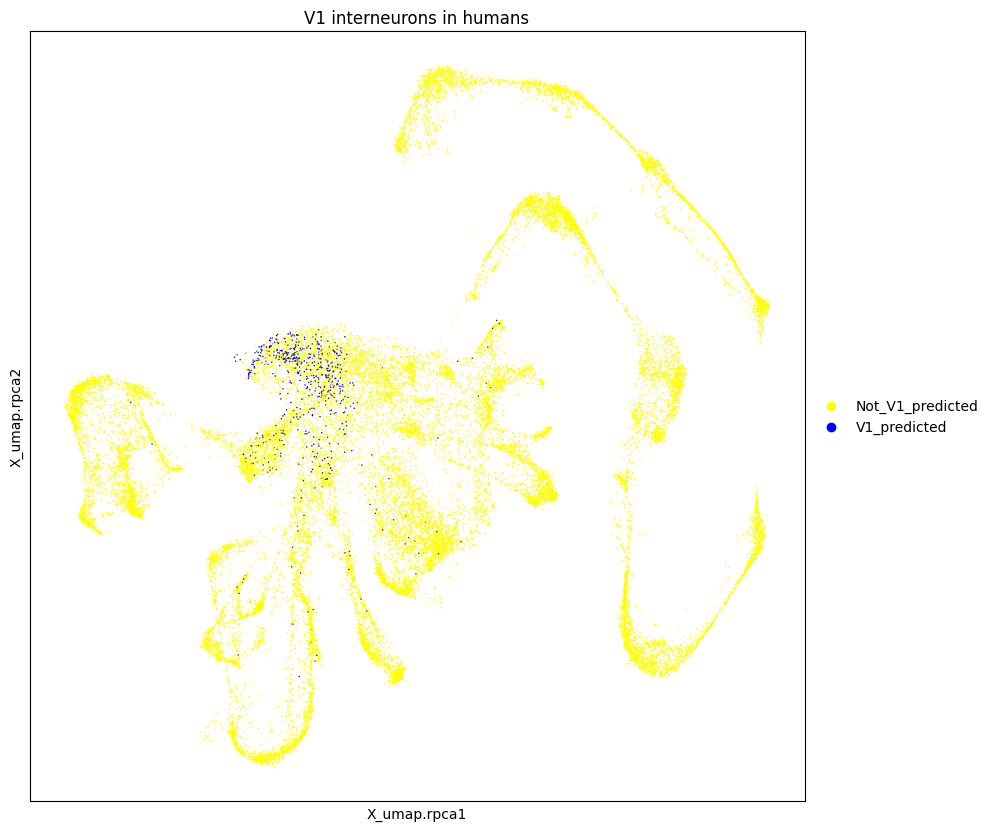

In [82]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated[integrated.obs['species'] == 'human'], basis = 'X_umap.rpca', color='predicted_annotation', title = 'V1 interneurons in humans', ax = ax)

In [88]:
# # Save annotated anndata
integrated.write('data/annotated_data/cross_species_all_sets.h5ad')

In [4]:
integrated = sc.read_h5ad('data/annotated_data/human_neurons_annotated_human_augmented.h5ad')

### SCCAF

In [ ]:
import SCCAF

In [ ]:
y_prob2, y_pred2, y_test2, clf2, cvsm2, acc2 = SCCAF.SCCAF_assessment(X, y, classifier = 'SVM', fraction = 0.8, n = 6000)

c:\Users\Emile\AppData\Local\Programs\Python\Python313\Lib\site-packages\SCCAF\__init__.py:251: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return X[c_idx, :], X[d_idx, :], y[c_idx], y[d_idx]


Mean CV accuracy: 0.9459
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9511


In [ ]:
y_pred_sccaf = clf2.predict(X_all)

In [ ]:
pd.DataFrame(y_pred_sccaf).value_counts()

0
0    16192
1     1965
Name: count, dtype: int64

In [ ]:
integrated.obs['predicted_lables_sccaf'] = y_pred_sccaf
integrated.obs['predicted_lables_sccaf'] = integrated.obs['predicted_lables_sccaf'].astype('category')

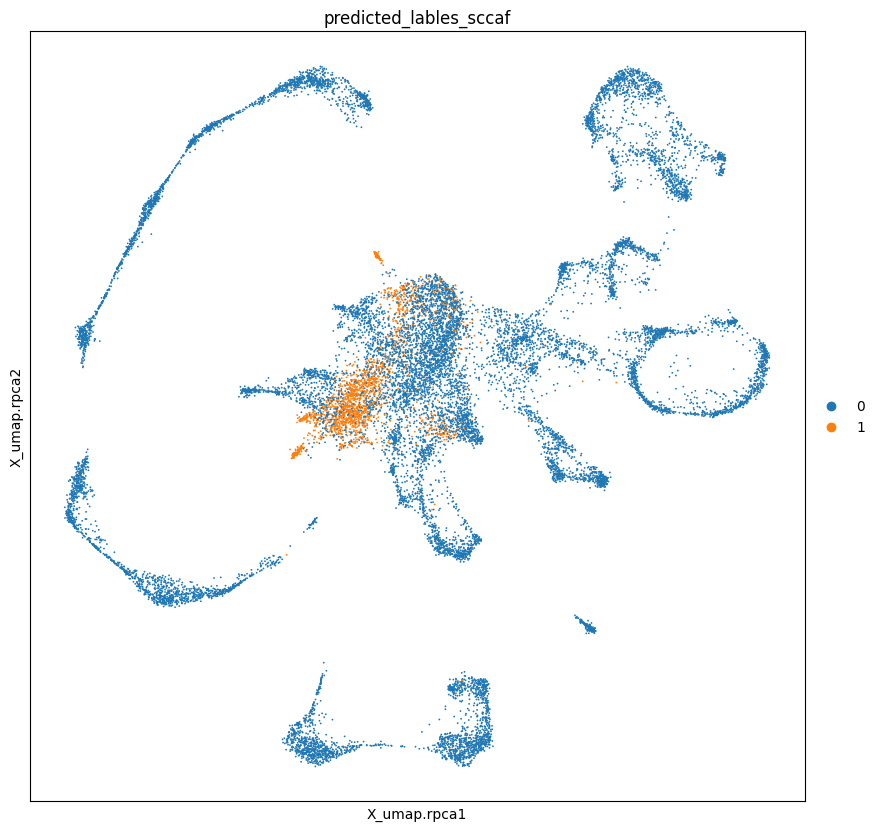

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
sc.pl.embedding(integrated, basis = 'X_umap.rpca', color='predicted_lables_sccaf', ax = ax)

In [ ]:
accuracy_score(y_pred_all_svm, y_pred_sccaf)

0.9882689871674836

## Exploring results

In [83]:
counts_xgb = integrated.obs.groupby(['orig.ident', 'predicted_labels_xgb']).size().unstack(fill_value=0)
counts_xgb

C:\Users\Emile\AppData\Local\Temp\ipykernel_21480\2086900617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_xgb = integrated.obs.groupby(['orig.ident', 'predicted_labels_xgb']).size().unstack(fill_value=0)


predicted_labels_xgb              0     1
orig.ident                               
BOUV5                          1385    32
GSE7474501                     3907   353
GSM7474503                     6535   249
KATHE                          2200   131
KNAF3                          3142   123
KNAF4                            44  1776
KNAF8                          4246    60
KNAF9                          2297    57
KNAF10                         1646    36
KNAF11                         2516    82
KNAF12_Humain-P11_NeuN_180325  8355   333
KNAF14                         3962  2077
MATSON                         2186   119
YADAV                          3511    44
ZHANG                          3631    32

In [84]:
# counts_sccaf = integrated.obs.groupby(['orig.ident', 'predicted_lables_sccaf']).size().unstack(fill_value=0)
# counts_sccaf

In [85]:
# Count labels per orig.ident in one dataframe
def compute_props(counts):
    counts['species'] = ['mouse', 'mouse', 'mouse','mouse', 'mouse', 'mouse', 'human', 'human', 'human', 'human', 'human', 'mouse', 'mouse','human', 'human']
    counts = counts.rename(columns={0: 'NeuronOnly', 1: 'V1', -1: 'Unassigned'})
    counts = counts.rename_axis(None, axis=1).reset_index()
    counts['proportion'] = counts['V1'] / (counts['V1'] + counts['NeuronOnly'])
    # Reorder columns
    counts = counts[['orig.ident', 'species', 'NeuronOnly', 'V1', 'proportion']]
    # Drop index
    counts = counts.reset_index(drop=True)
    return counts

In [86]:
counts_xgb = compute_props(counts_xgb)
counts_xgb.sort_values(by = 'species')

orig.ident species  NeuronOnly    V1  proportion
6                           KNAF8   human        4246    60    0.013934
7                           KNAF9   human        2297    57    0.024214
8                          KNAF10   human        1646    36    0.021403
9                          KNAF11   human        2516    82    0.031563
10  KNAF12_Humain-P11_NeuN_180325   human        8355   333    0.038329
13                          YADAV   human        3511    44    0.012377
14                          ZHANG   human        3631    32    0.008736
0                           BOUV5   mouse        1385    32    0.022583
1                      GSE7474501   mouse        3907   353    0.082864
2                      GSM7474503   mouse        6535   249    0.036704
3                           KATHE   mouse        2200   131    0.056199
4                           KNAF3   mouse        3142   123    0.037672
5                           KNAF4   mouse          44  1776    0.975824
11                         KNAF14   mouse        3962  2077    0.343931
12                         MATSON   mouse        2186   119    0.051627

In [1]:
3652+3535+2540+1656+2330+4266+40+24+26+58+20+11

18158

In [87]:
counts_xgb[counts_xgb['species'] == 'human']['V1'].sum()

np.int64(644)

In [88]:
counts_xgb[counts_xgb['species'] == 'human']['NeuronOnly'].sum()

np.int64(26428)

In [57]:
counts_svm = integrated.obs.groupby(['orig.ident', 'predicted_labels_svm']).size().unstack(fill_value=0)
counts_svm = compute_props(counts_svm)
counts_svm.sort_values(by = 'species')

C:\Users\Emile\AppData\Local\Temp\ipykernel_8776\3790939744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_svm = integrated.obs.groupby(['orig.ident', 'predicted_labels_svm']).size().unstack(fill_value=0)


orig.ident species  NeuronOnly    V1  proportion
2      KNAF8   human        4306     0    0.000000
3      KNAF9   human        2353     1    0.000425
4     KNAF10   human        1676     6    0.003567
5     KNAF11   human        2568    30    0.011547
6      YADAV   human        3555     0    0.000000
7      ZHANG   human        3663     0    0.000000
0      KNAF3   mouse        3241    24    0.007351
1      KNAF4   mouse           6  1814    0.996703

In [58]:
counts_knn = integrated.obs.groupby(['orig.ident', 'predicted_labels_knn']).size().unstack(fill_value=0)
counts_knn = compute_props(counts_knn)
counts_knn

C:\Users\Emile\AppData\Local\Temp\ipykernel_8776\3522573065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_knn = integrated.obs.groupby(['orig.ident', 'predicted_labels_knn']).size().unstack(fill_value=0)


orig.ident species  NeuronOnly    V1  proportion
0      KNAF3   mouse        2992   273    0.083614
1      KNAF4   mouse         116  1704    0.936264
2      KNAF8   human        3740   566    0.131444
3      KNAF9   human        1987   367    0.155905
4     KNAF10   human        1396   286    0.170036
5     KNAF11   human        2210   388    0.149346
6      YADAV   human        2815   740    0.208158
7      ZHANG   human        3169   494    0.134862

In [59]:
# Plot mouse V1 against human V1
mouse_v1 = integrated[(integrated.obs['species'] == 'mouse') & (integrated.obs['predicted_labels_xgb'] == 1)]
human_v1 = integrated[(integrated.obs['species'] == 'human') & (integrated.obs['predicted_labels_xgb'] == 1)]

In [60]:
comparison = sc.concat([mouse_v1, human_v1])

In [61]:
comparison

AnnData object with n_obs × n_vars = 2012 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'species', 'RNA_snn_res.2', 'seurat_clusters', 'training_labels', 'labels_xgb', 'annotation', 'predicted_labels_xgb', 'predicted_labels_svm', 'predicted_labels_knn', 'predicted_annotation'
    obsm: 'X_pca', 'X_rpca', 'X_umap.rpca'

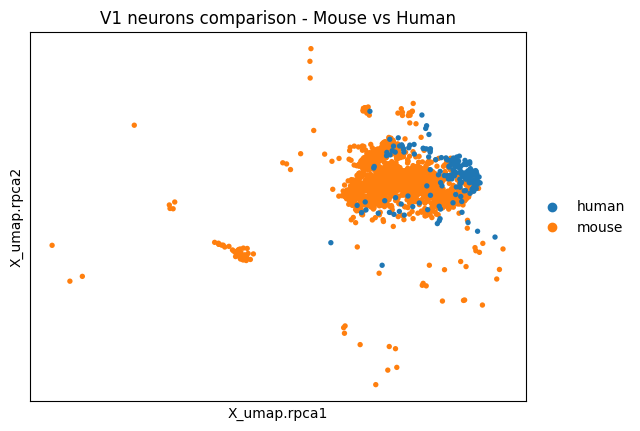

In [62]:
# Plot embeddings
sc.pl.embedding(comparison, basis = 'X_umap.rpca', color='species', save='comparison_species.png', title='V1 neurons comparison - Mouse vs Human')

In [54]:
# Chi2 test to evaluate if the distribution of V1 neurons in humans is likely

from scipy.stats import chi2_contingency
obs = np.array([[counts_xgb['V1'][3], counts_xgb['NeuronOnly'][3]], [counts_xgb['V1'][4], counts_xgb['NeuronOnly'][4]], [counts_xgb['V1'][5], counts_xgb['NeuronOnly'][5]], [counts_xgb['V1'][6], counts_xgb['NeuronOnly'][6]]])
obs

array([[1794,   26],
       [  53, 4253],
       [ 113, 2241],
       [  11, 1671]])

In [55]:
chi2, p, dof, ex = chi2_contingency(obs)

In [56]:
# Shox results
print('Chi2: %.2f' % chi2)
print('p-value: %.2f' % p)


Chi2: 8905.24
p-value: 0.00


In [57]:
# test de fisher 
from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact(obs)

print('Odds ratio: %.2f' % oddsratio)
print('p-value: %.2f' % pvalue)

Odds ratio: 0.00
p-value: 0.00


In [58]:
# Equivalence test TOST
from statsmodels.stats.proportion import tost_proportions_2indep

count1, nobs1 = counts_xgb['V1'][3], counts_xgb['V1'][3] + counts_xgb['NeuronOnly'][3]
count2, nobs2 = counts_xgb['V1'][4], counts_xgb['V1'][4] + counts_xgb['NeuronOnly'][4]
eps = 0.1 * (counts_xgb['proportion'][3] + counts_xgb['proportion'][4]) / 2
print(count1, nobs1, count2, nobs2, eps)

test = tost_proportions_2indep(count1, nobs1, count2, nobs2, -eps, eps, compare = 'diff')
print(test)

1794 1820 53 4306 0.04990113462942075
statistic = 279.671544365363
pvalue = 1.0
compare = diff
method = None
results_larger = statistic = 309.92025852924104
    pvalue = 0.0
    compare = diff
    method = agresti-caffo
    diff = 0.9734058788401566
    ratio = 80.08463611859838
    odds_ratio = 5536.924528301907
    variance = 1.0885966569652297e-05
    alternative = larger
    value = -0.04990113462942075
    tuple = (np.float64(309.92025852924104), np.float64(0.0))
results_smaller = statistic = 279.671544365363
    pvalue = 1.0
    compare = diff
    method = agresti-caffo
    diff = 0.9734058788401566
    ratio = 80.08463611859838
    odds_ratio = 5536.924528301907
    variance = 1.0885966569652297e-05
    alternative = smaller
    value = 0.04990113462942075
    tuple = (np.float64(279.671544365363), np.float64(1.0))
title = Equivalence test for 2 independent proportions
tuple = (np.float64(279.671544365363), np.float64(1.0))


In [59]:
count1, nobs1 = counts_xgb['V1'][5], counts_xgb['V1'][5] + counts_xgb['NeuronOnly'][5]
count2, nobs2 = counts_xgb['V1'][6], counts_xgb['V1'][6] + counts_xgb['NeuronOnly'][6]
eps = 0.5 * (counts_xgb['proportion'][5] + counts_xgb['proportion'][6]) / 2
print(count1, nobs1, count2, nobs2, eps)

test = tost_proportions_2indep(count1, nobs1, count2, nobs2, -eps, eps, compare = 'diff')
print(test)

113 2354 11 1682 0.013635808000549575
statistic = 5.66915815048264
pvalue = 0.9999999928249569
compare = diff
method = None
results_larger = statistic = 11.265714765547576
    pvalue = 9.688658045200063e-30
    compare = diff
    method = agresti-caffo
    diff = 0.041463564939178084
    ratio = 7.3401560206997765
    odds_ratio = 7.659851527321408
    variance = 2.3745424799433416e-05
    alternative = larger
    value = -0.013635808000549575
    tuple = (np.float64(11.265714765547576), np.float64(9.688658045200063e-30))
results_smaller = statistic = 5.66915815048264
    pvalue = 0.9999999928249569
    compare = diff
    method = agresti-caffo
    diff = 0.041463564939178084
    ratio = 7.3401560206997765
    odds_ratio = 7.659851527321408
    variance = 2.3745424799433416e-05
    alternative = smaller
    value = 0.013635808000549575
    tuple = (np.float64(5.66915815048264), np.float64(0.9999999928249569))
title = Equivalence test for 2 independent proportions
tuple = (np.float64(5.